In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style = "whitegrid")

In [5]:
import sys
print(sys.executable)

c:\Users\keval\Desktop\DataScienceAssignment\venv\Scripts\python.exe


In [11]:
fear_greed_df = pd.read_csv('../data/fear_greed_index.csv')
historical_data_df = pd.read_csv('../data/historical_data.csv')

In [12]:
print("Fear & Greed DataFrame Info:")
fear_greed_df.info()
print("\nMissing Values in Fear & Greed DataFrame:\n",fear_greed_df.isnull().sum())

print("Historical DataFrame Info:")
historical_data_df.info()
print("\nMissing Values in Historical DataFrame:\n",historical_data_df.isnull().sum())


Fear & Greed DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB

Missing Values in Fear & Greed DataFrame:
 timestamp         0
value             0
classification    0
date              0
dtype: int64
Historical DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-n

In [13]:
fear_greed_df = fear_greed_df.loc[:, ~fear_greed_df.columns.str.contains('^Unnamed')]
historical_data_df = historical_data_df.loc[:, ~historical_data_df.columns.str.contains('^Unnamed')]

In [ ]:
if 'date' in fear_greed_df.columns:
    fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'], errors='coerce')

In [14]:
if 'date' in historical_data_df.columns:
    historical_data_df['date'] = pd.to_datetime(historical_data_df['date'], errors='coerce')


In [15]:
fear_greed_df = fear_greed_df.dropna(how="all")
historical_data_df = historical_data_df.dropna(how= "all")

In [16]:
fear_greed_df = fear_greed_df.reset_index(drop= True)
historical_data_df = historical_data_df.reset_index(drop=True)


In [15]:
print(fear_greed_df.info())
print(historical_data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 n

In [16]:
print(fear_greed_df.describe())
print(historical_data_df.describe())

          timestamp        value
count  2.644000e+03  2644.000000
mean   1.631899e+09    46.981089
std    6.597967e+07    21.827680
min    1.517463e+09     5.000000
25%    1.574811e+09    28.000000
50%    1.631900e+09    46.000000
75%    1.688989e+09    66.000000
max    1.746164e+09    95.000000
       Execution Price   Size Tokens      Size USD  Start Position  \
count    211224.000000  2.112240e+05  2.112240e+05    2.112240e+05   
mean      11414.723350  4.623365e+03  5.639451e+03   -2.994625e+04   
std       29447.654868  1.042729e+05  3.657514e+04    6.738074e+05   
min           0.000005  8.740000e-07  0.000000e+00   -1.433463e+07   
25%           4.854700  2.940000e+00  1.937900e+02   -3.762311e+02   
50%          18.280000  3.200000e+01  5.970450e+02    8.472793e+01   
75%         101.580000  1.879025e+02  2.058960e+03    9.337278e+03   
max      109004.000000  1.582244e+07  3.921431e+06    3.050948e+07   

          Closed PnL      Order ID            Fee      Trade ID     Time

In [22]:
print(historical_data_df.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [24]:
historical_data_df.columns = historical_data_df.columns.str.lower().str.replace(' ', '_')
fear_greed_df.columns = fear_greed_df.columns.str.lower().str.replace(' ', '_')
print(historical_data_df.columns)
print(fear_greed_df.columns)

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [27]:
historical_data_df['date'] = pd.to_datetime(historical_data_df["timestamp_ist"],dayfirst=True).dt.date

daily_trader_stats  = historical_data_df.groupby('date').agg({
    'closed_pnl': 'sum',
    'size_usd': 'mean',
    'account': 'count'
}).reset_index().rename(columns={'account':'num_traders'})

daily_trader_stats.head()


,date,closed_pnl,size_usd,num_traders
0,2023-05-01,0.000000,159.000000,3
1,2023-12-05,0.000000,5556.203333,9
2,2023-12-14,-205.434737,10291.213636,11
3,2023-12-15,-24.632034,5304.975000,2
4,2023-12-16,0.000000,5116.256667,3


In [29]:
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date']).dt.date
merged_df = pd.merge(daily_trader_stats, fear_greed_df, on='date', how='left')
merged_df.head()

,date,closed_pnl,size_usd,num_traders,timestamp,value,classification
0,2023-05-01,0.000000,159.000000,3,1.682919e+09,63.0,Greed
1,2023-12-05,0.000000,5556.203333,9,1.701754e+09,75.0,Extreme Greed
2,2023-12-14,-205.434737,10291.213636,11,1.702532e+09,72.0,Greed
3,2023-12-15,-24.632034,5304.975000,2,1.702618e+09,70.0,Greed
4,2023-12-16,0.000000,5116.256667,3,1.702705e+09,67.0,Greed


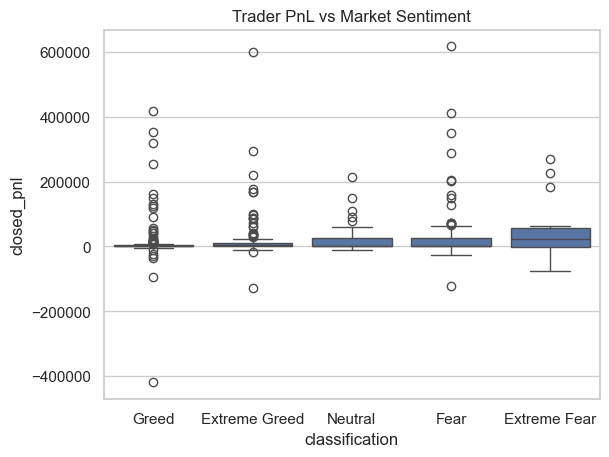

In [31]:
sns.boxplot(x='classification', y='closed_pnl', data=merged_df)
plt.title('Trader PnL vs Market Sentiment')
plt.show()


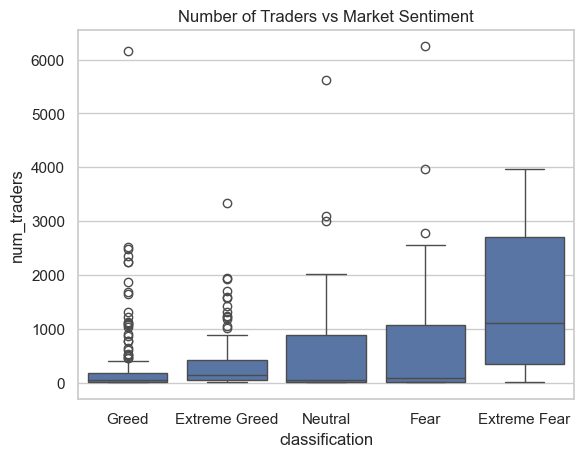

In [32]:
sns.boxplot(x='classification',y= 'num_traders',data =merged_df)
plt.title("Number of Traders vs Market Sentiment")
plt.show()

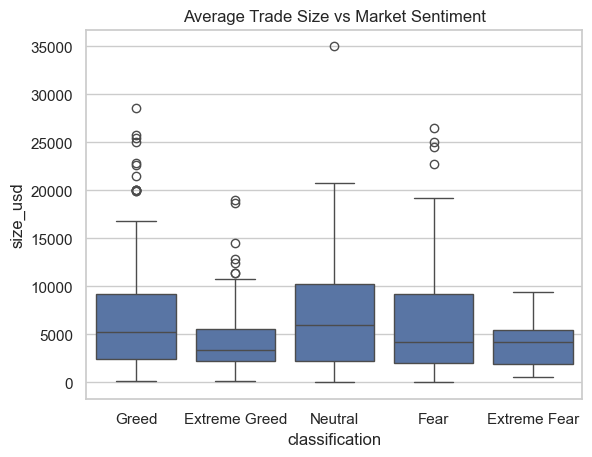

In [33]:
sns.boxplot(x='classification',y='size_usd',data = merged_df)
plt.title("Average Trade Size vs Market Sentiment")
plt.show()

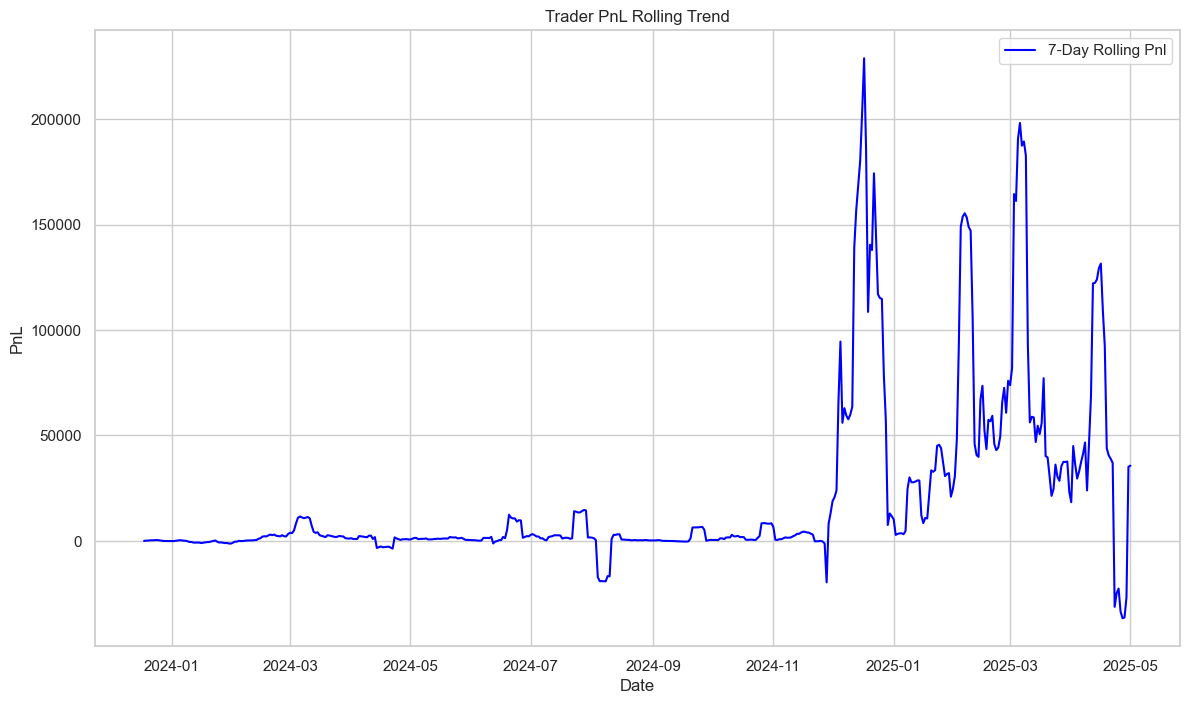

In [35]:
merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df = merged_df.sort_values('date')

merged_df['pnl_rolling'] = merged_df['closed_pnl'].rolling(window=7).mean()
merged_df['num_trader_rolling'] = merged_df['num_traders'].rolling(window=7).mean()
merged_df['size_usd_rolling'] = merged_df['size_usd'].rolling(window=7).mean()

plt.figure(figsize = (14,8))
plt.plot(merged_df['date'], merged_df['pnl_rolling'],label='7-Day Rolling Pnl',color='blue')
plt.title('Trader PnL Rolling Trend')
plt.xlabel('Date')
plt.ylabel('PnL')
plt.legend()
plt.show()

In [36]:
if 'leverage' in historical_data_df.columns:
    sns.scatterplot(x='leverage',y='closed_pnl',hue='classification',data=merged_df,alpha=0.7)
    plt.title("leverage vs Trader PnL by Market Sentiment")
    plt.show()

In [37]:
print(fear_greed_df.columns)
print(historical_data_df.columns)

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp', 'date'],
      dtype='object')


In [39]:
account_stats = historical_data_df.groupby('account').agg({
    'closed_pnl':'sum',
    'size_usd':'mean',
    'side': 'count'
}).reset_index().rename(columns={'side':'num_trades'})

top_traders = account_stats[account_stats['closed_pnl'] >= account_stats['closed_pnl'].quantile(0.9)]
bottom_traders = account_stats[account_stats['closed_pnl'] >= account_stats['closed_pnl'].quantile(0.1)]

top_traders.head()
bottom_traders.head()

,account,closed_pnl,size_usd,num_trades
0,0x083384f897ee0f19899168e3b1bec365f52a9012,1.600230e+06,16159.576734,3818
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,4.788532e+04,1653.226327,7280
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,1.324648e+05,507.626933,13311
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,1.686580e+05,3138.894782,3239
7,0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6,5.349625e+04,3445.471265,332


Correlation Matrix:                 value  closed_pnl  size_usd  num_traders
value        1.000000   -0.082642 -0.051824    -0.245241
closed_pnl  -0.082642    1.000000 -0.014952     0.360083
size_usd    -0.051824   -0.014952  1.000000    -0.049065
num_traders -0.245241    0.360083 -0.049065     1.000000


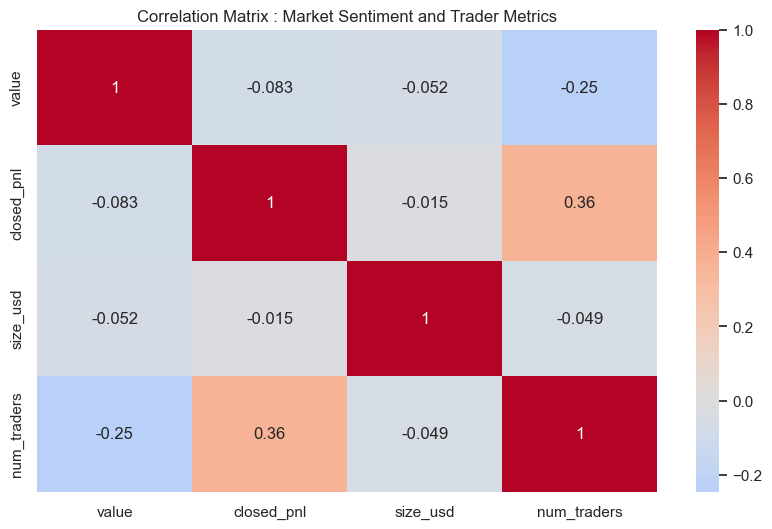

In [42]:
correlation_matrix = merged_df[['value','closed_pnl','size_usd','num_traders']].corr()
print("Correlation Matrix:", correlation_matrix)

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot = True,cmap='coolwarm',center=0)
plt.title("Correlation Matrix : Market Sentiment and Trader Metrics")
plt.show()

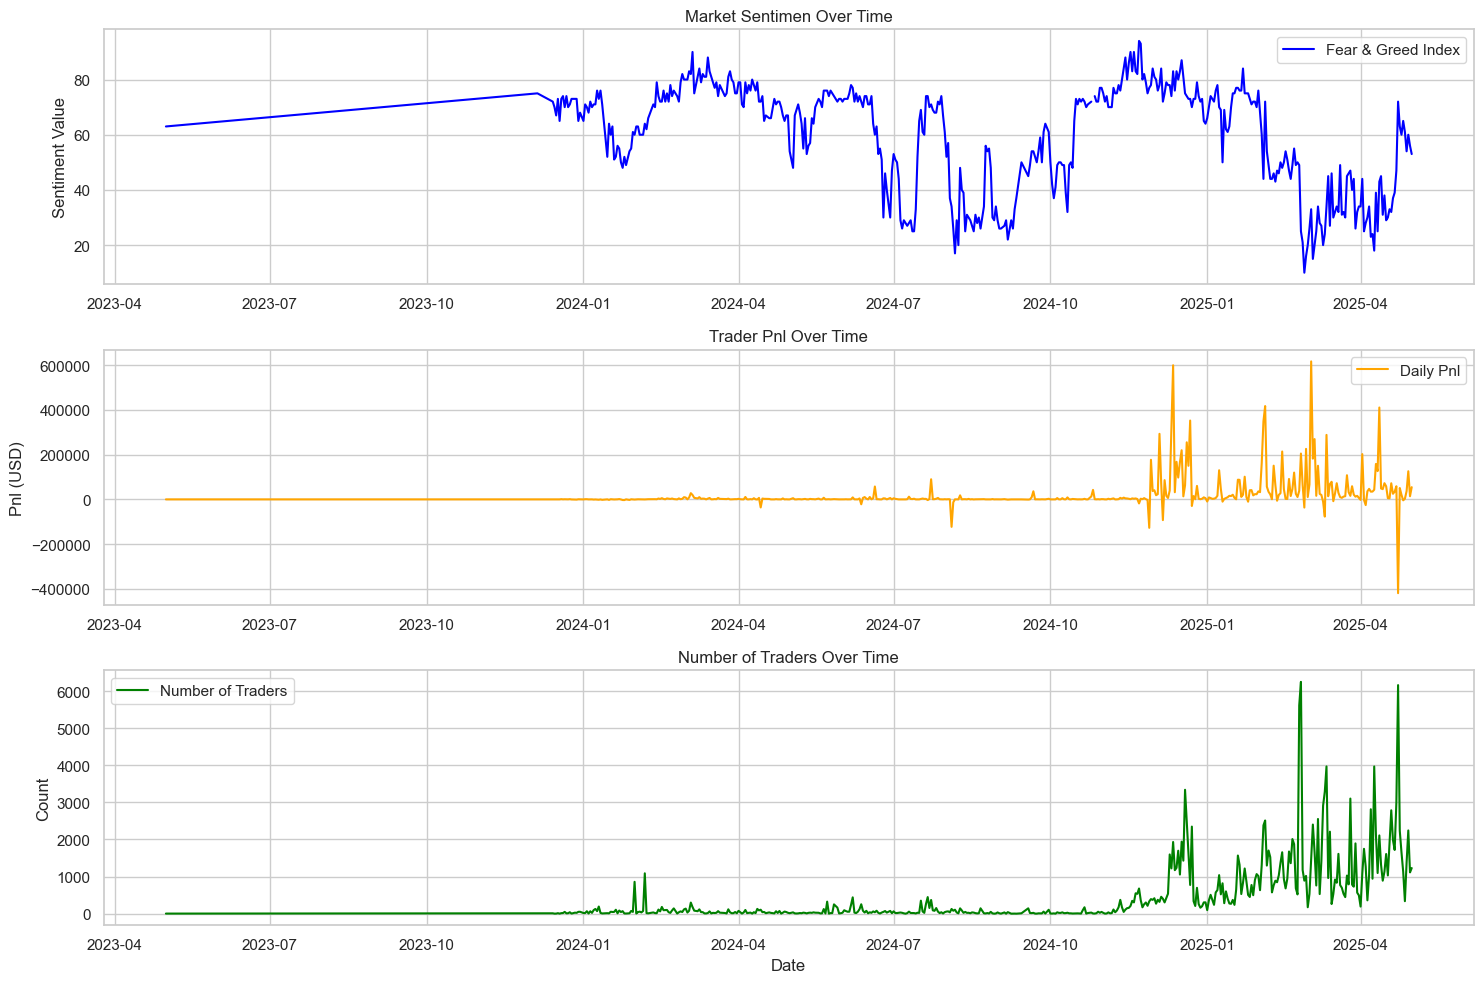

In [46]:
merged_df['date'] = pd.to_datetime(merged_df['date'])
plt.figure(figsize=(15,10))

plt.subplot(3,1,1)
plt.plot(merged_df['date'],merged_df['value'],label = 'Fear & Greed Index',color='blue')
plt.title('Market Sentimen Over Time')
plt.ylabel('Sentiment Value')
plt.legend()

plt.subplot(3,1,2)
plt.plot(merged_df['date'],merged_df['closed_pnl'], label="Daily Pnl", color = 'orange')
plt.title("Trader Pnl Over Time")
plt.ylabel('Pnl (USD)')
plt.legend()

plt.subplot(3,1,3)
plt.plot(merged_df['date'],merged_df['num_traders'],label='Number of Traders', color='green')
plt.title("Number of Traders Over Time")
plt.ylabel('Count')
plt.xlabel('Date')
plt.legend()

plt.tight_layout()
plt.show()


In [48]:
from scipy  import stats

sentiment_stats = merged_df.groupby('classification').agg({
    'closed_pnl':['mean','std','count'],
    'size_usd':['mean', 'std'],
    'num_traders': ['mean','std']      
}).round(2)


print("Performance Statistics by Market Sentiment:")
print(sentiment_stats)

extreme_greed = merged_df[merged_df['classification']== 'Extreme Greed']['closed_pnl']
fear = merged_df[merged_df['classification']== 'Fear']['closed_pnl']

t_stat, p_value = stats.ttest_ind(extreme_greed.dropna(),fear.dropna(),equal_var=False)
print(f'\nT-test between Extreme Greed and Fear periods:')
print(f'T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}')

Performance Statistics by Market Sentiment:
               closed_pnl                  size_usd          num_traders  \
                     mean        std count     mean      std        mean   
classification                                                             
Extreme Fear     52793.59  101262.39    14  4091.80  2509.29     1528.57   
Extreme Greed    23817.29   72827.30   114  4410.52  3441.66      350.81   
Fear             36891.82   96611.85    91  6524.29  6343.21      679.53   
Greed            11140.57   62427.96   193  6735.30  5864.30      260.64   
Neutral          19297.32   37995.21    67  7157.53  6297.82      562.48   

                         
                    std  
classification           
Extreme Fear    1326.87  
Extreme Greed    523.13  
Fear            1013.50  
Greed            638.11  
Neutral          949.63  

T-test between Extreme Greed and Fear periods:
T-statistic: -1.071, P-value: 0.286


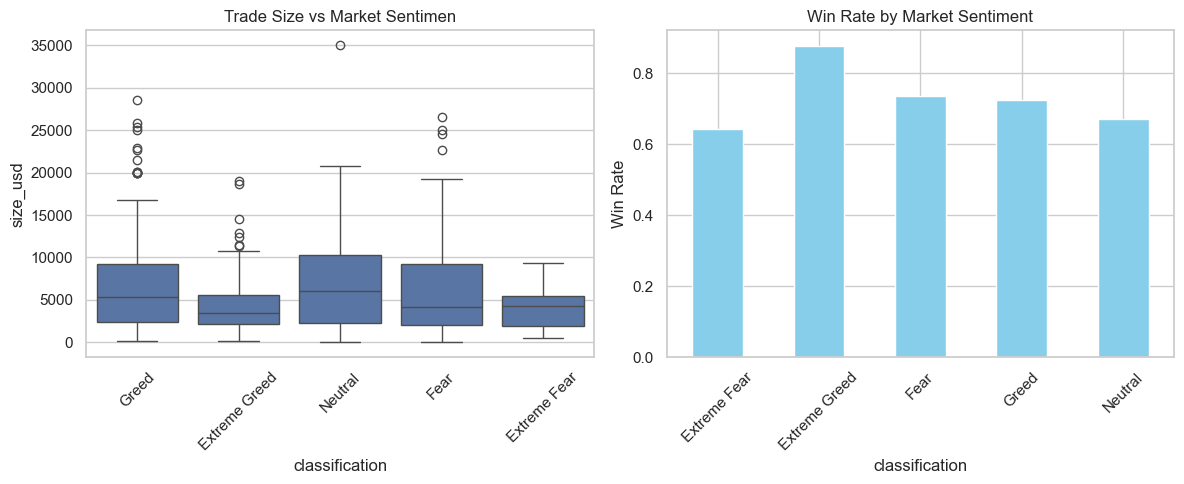

In [50]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x="classification", y='size_usd',data=merged_df)
plt.title('Trade Size vs Market Sentimen')
plt.xticks(rotation=45)


plt.subplot(1,2,2)
merged_df['profitable'] = merged_df['closed_pnl'] > 0
win_rates = merged_df.groupby('classification')['profitable'].mean()

win_rates.plot(kind='bar',color='skyblue')
plt.title('Win Rate by Market Sentiment')
plt.ylabel('Win Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [59]:
#key insights summarys
print("KEY INSIGHTS SUMMARY:")
print('='*50)

#1.overall correlation
corr_with_sentiment = correlation_matrix.loc['value'].drop('value')
print("\n1. Correlation with Market Sentiment:")
for metric, corr_value in corr_with_sentiment.items():
    print(f"   {metric}: {corr_value:.3f}")

#2. Best Performing Sentiment
best_sentiment= merged_df.groupby('classification')['closed_pnl'].mean().idxmax()
best_pnl = merged_df.groupby('classification')['closed_pnl'].mean().max()
print(f"\n2. Best performing sentiment: {best_sentiment} (Avg PnL: ${best_pnl:.2f})")

#3.Trader activity by sentimen
most_active = merged_df.groupby('classification')['num_traders'].mean().idxmax()
least_active = merged_df.groupby('classification')['num_traders'].mean().idxmax()
print(f"3. Most trader activity during: {most_active}")
print(f' Least trader activity during: {least_active}')

'''4. Risk analysis (volatility)'''
volatility_by_sentiment = merged_df.groupby('classification')['closed_pnl'].std()
highest_vol = volatility_by_sentiment.idxmax()
print(f'4. Highest PnL volatility during: {highest_vol}')

'''5. Additional insights '''#
print(f"\n5. Additional Insights:")
print(f'  Total  trading days analyzed : {len(merged_df)}')
print(f'  Date Range : {merged_df['date'].min()} to {merged_df['date'].max()}')
print(f'  Averag daily traders: {merged_df['num_traders'].mean():.1f}')
print(f'  Average dailt PnL: ${merged_df['closed_pnl'].mean():.2f}')

KEY INSIGHTS SUMMARY:

1. Correlation with Market Sentiment:
   closed_pnl: -0.083
   size_usd: -0.052
   num_traders: -0.245

2. Best performing sentiment: Extreme Fear (Avg PnL: $52793.59)
3. Most trader activity during: Extreme Fear
 Least trader activity during: Extreme Fear
4. Highest PnL volatility during: Extreme Fear

5. Additional Insights:
  Total  trading days analyzed : 480
  Date Range : 2023-05-01 00:00:00 to 2025-05-01 00:00:00
  Averag daily traders: 440.1
  Average dailt PnL: $21452.00


In [63]:
'''Advance  Analysis'''

print("\nADVANCED ANALYSIS")
print('='*50)

sentiment_performance = merged_df.groupby('classification').agg({
    'closed_pnl': ['mean', 'std', 'count'],
    'size_usd': 'mean',
    'num_traders': 'mean',
    'value': 'mean'
}).round(2)

print("Detailed Performance bt sentiment")
print(sentiment_performance)


risk_free_rate = 0.00
sharpe_ratios = {}
for sentiment in merged_df['classification'].unique():
     pnl_data = merged_df[merged_df['classification'] == sentiment]['closed_pnl']
     if len(pnl_data)> 1 :
        sharpe = (pnl_data.mean() - risk_free_rate)/pnl_data.std()
        sharpe_ratios[sentiment] = sharpe

print(f"\n Risk-Adjusted Returns (Sharpe Ratio):")
for sentiment, sharpe in sorted(sharpe_ratios.items(), key=lambda x: x[1], reverse=True):
    print(f"   {sentiment}: {sharpe:.3f}")

merged_df['profitable'] = merged_df['closed_pnl'] > 0
win_rates = merged_df.groupby('classification')['profitable'].mean()

print(f"\nWin Rate by Sentiment:")
for sentiment, win_rate in win_rates.items():
    print(f"   {sentiment}: {win_rate:.1%}")


ADVANCED ANALYSIS
Detailed Performance bt sentiment
               closed_pnl                  size_usd num_traders  value
                     mean        std count     mean        mean   mean
classification                                                        
Extreme Fear     52793.59  101262.39    14  4091.80     1528.57  19.29
Extreme Greed    23817.29   72827.30   114  4410.52      350.81  79.25
Fear             36891.82   96611.85    91  6524.29      679.53  32.26
Greed            11140.57   62427.96   193  6735.30      260.64  68.34
Neutral          19297.32   37995.21    67  7157.53      562.48  49.79

 Risk-Adjusted Returns (Sharpe Ratio):
   Extreme Fear: 0.521
   Neutral: 0.508
   Fear: 0.382
   Extreme Greed: 0.327
   Greed: 0.178

Win Rate by Sentiment:
   Extreme Fear: 64.3%
   Extreme Greed: 87.7%
   Fear: 73.6%
   Greed: 72.5%
   Neutral: 67.2%
